FAO master dataset: # excluded from git

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
# Read the data
fao_data = pd.read_csv('D:/vscode/python/unbdh/data/raw/FAOMasterDataset.csv')

In [10]:
fao_data.head()

Domain Code                             Domain  Area Code (M49)  \
0          FS  Suite of Food Security Indicators                4   
1          FS  Suite of Food Security Indicators                4   
2          FS  Suite of Food Security Indicators                4   
3          FS  Suite of Food Security Indicators                4   
4          FS  Suite of Food Security Indicators                4   

          Area  Element Code Element Item Code  \
0  Afghanistan          6121   Value     21010   
1  Afghanistan          6121   Value     21010   
2  Afghanistan          6121   Value     21010   
3  Afghanistan          6121   Value     21010   
4  Afghanistan          6121   Value     21010   

                                                Item  Year Code       Year  \
0  Average dietary energy supply adequacy (percen...   20002002  2000-2002   
1  Average dietary energy supply adequacy (percen...   20012003  2001-2003   
2  Average dietary energy supply adequacy (percen...   20022004  2002-2004   
3  Average dietary energy supply adequacy (percen...   20032005  2003-2005   
4  Average dietary energy supply adequacy (percen...   20042006  2004-2006   

  Unit Value Flag Flag Description Note  
0    %    87    E  Estimated value  NaN  
1    %    88    E  Estimated value  NaN  
2    %    91    E  Estimated value  NaN  
3    %    92    E  Estimated value  NaN  
4    %    92    E  Estimated value  NaN

In [11]:
fao_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140871 entries, 0 to 140870
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Domain Code       140871 non-null  object
 1   Domain            140871 non-null  object
 2   Area Code (M49)   140871 non-null  int64 
 3   Area              140871 non-null  object
 4   Element Code      140871 non-null  int64 
 5   Element           140871 non-null  object
 6   Item Code         140871 non-null  object
 7   Item              140871 non-null  object
 8   Year Code         140871 non-null  int64 
 9   Year              140871 non-null  object
 10  Unit              140871 non-null  object
 11  Value             120814 non-null  object
 12  Flag              140871 non-null  object
 13  Flag Description  140871 non-null  object
 14  Note              1084 non-null    object
dtypes: int64(3), object(12)
memory usage: 16.1+ MB


In [12]:
fao_data.describe()

Area Code (M49)   Element Code     Year Code
count    140871.000000  140871.000000  1.408710e+05
mean        426.200723    6126.292438  8.506580e+06
std         254.083843       9.521429  9.935825e+06
min           4.000000    6121.000000  2.000000e+03
25%         204.000000    6121.000000  2.009000e+03
50%         422.000000    6123.000000  2.018000e+03
75%         643.000000    6128.000000  2.010201e+07
max         894.000000    6173.000000  2.019202e+07

In [14]:
fao_data['Area'].value_counts()

Bangladesh                          779
Peru                                771
Mongolia                            767
United States of America            763
Democratic Republic of the Congo    762
                                   ... 
China, mainland                     493
New Caledonia                       487
French Polynesia                    487
China, Taiwan Province of           484
Tokelau                             466
Name: Area, Length: 204, dtype: int64

<AxesSubplot:>

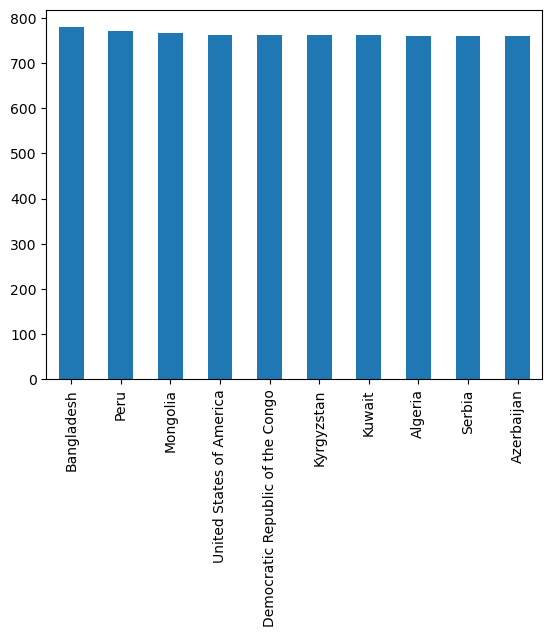

In [18]:
# Plot the top 10 countries with the highest number of observations
fao_data['Area'].value_counts().head(10).plot(kind='bar')

<AxesSubplot:>

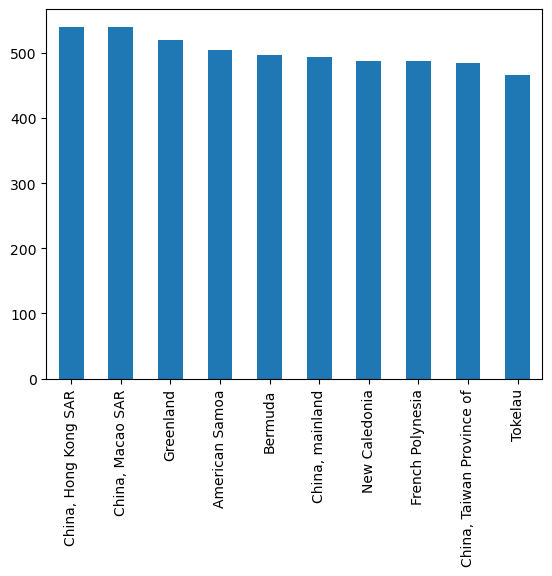

In [19]:
# Plot the top 10 countries with the lowest number of observations
fao_data['Area'].value_counts().tail(10).plot(kind='bar')

<AxesSubplot:>

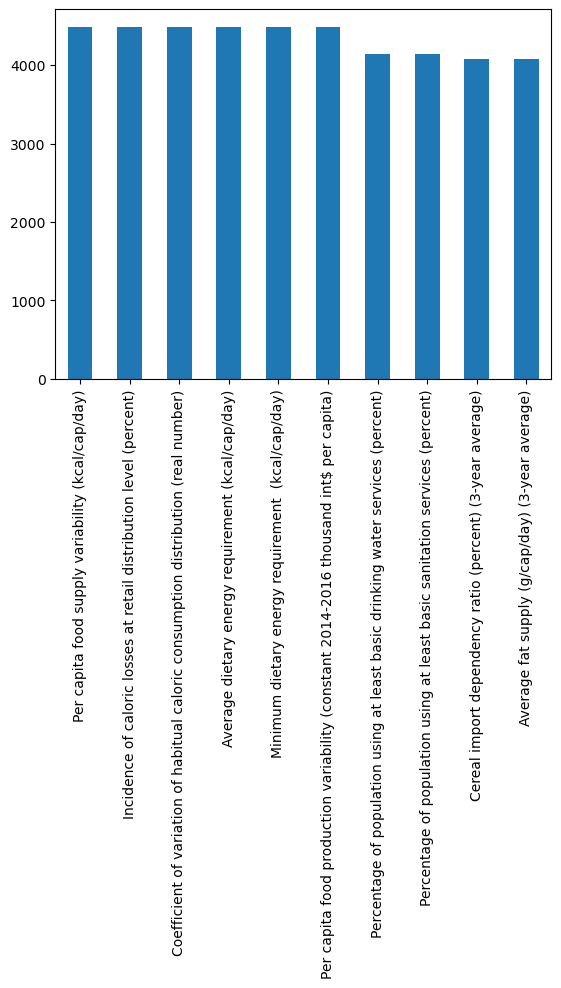

In [20]:
# Plot the top items 
fao_data['Item'].value_counts().head(10).plot(kind='bar')

<AxesSubplot:xlabel='Item'>

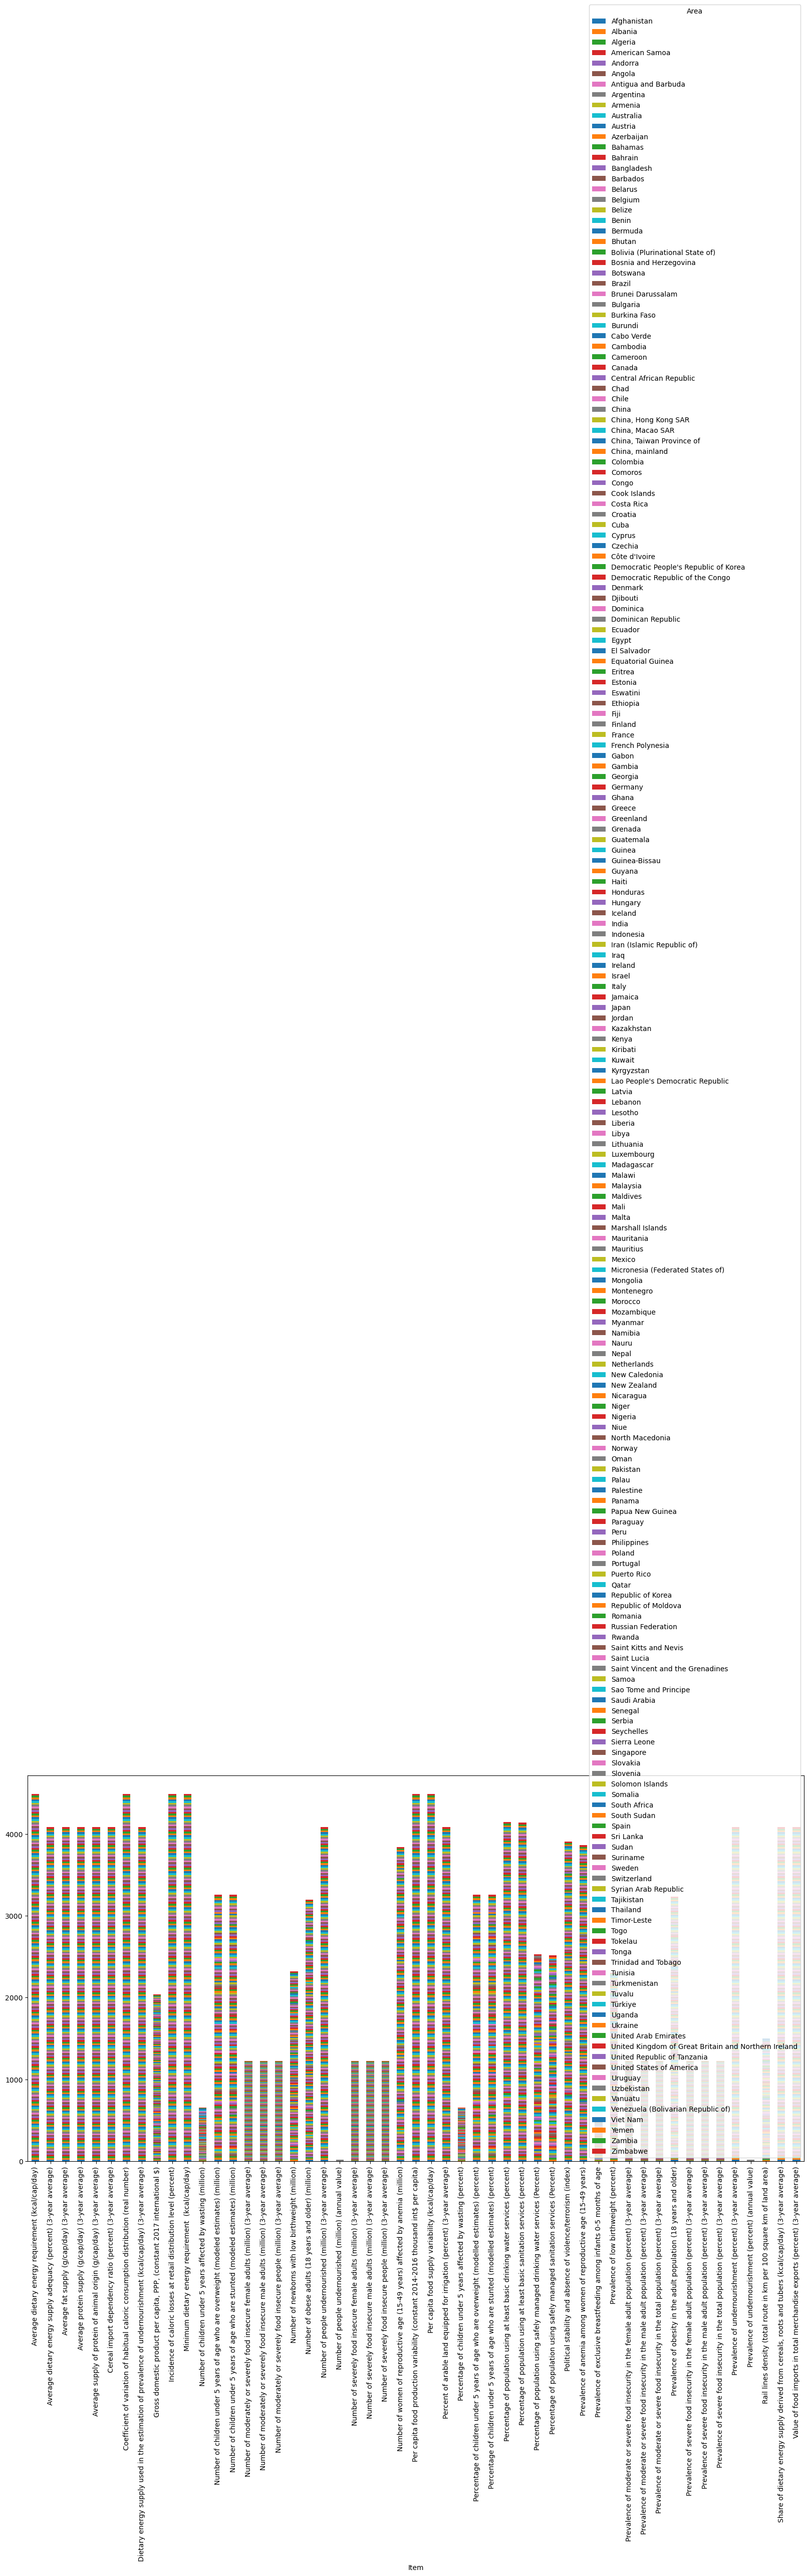

In [30]:
# plot item vs area
fao_data.groupby(['Item', 'Area']).size().unstack().plot(kind='bar', stacked=True, figsize=(20,10))

<AxesSubplot:xlabel='Area'>

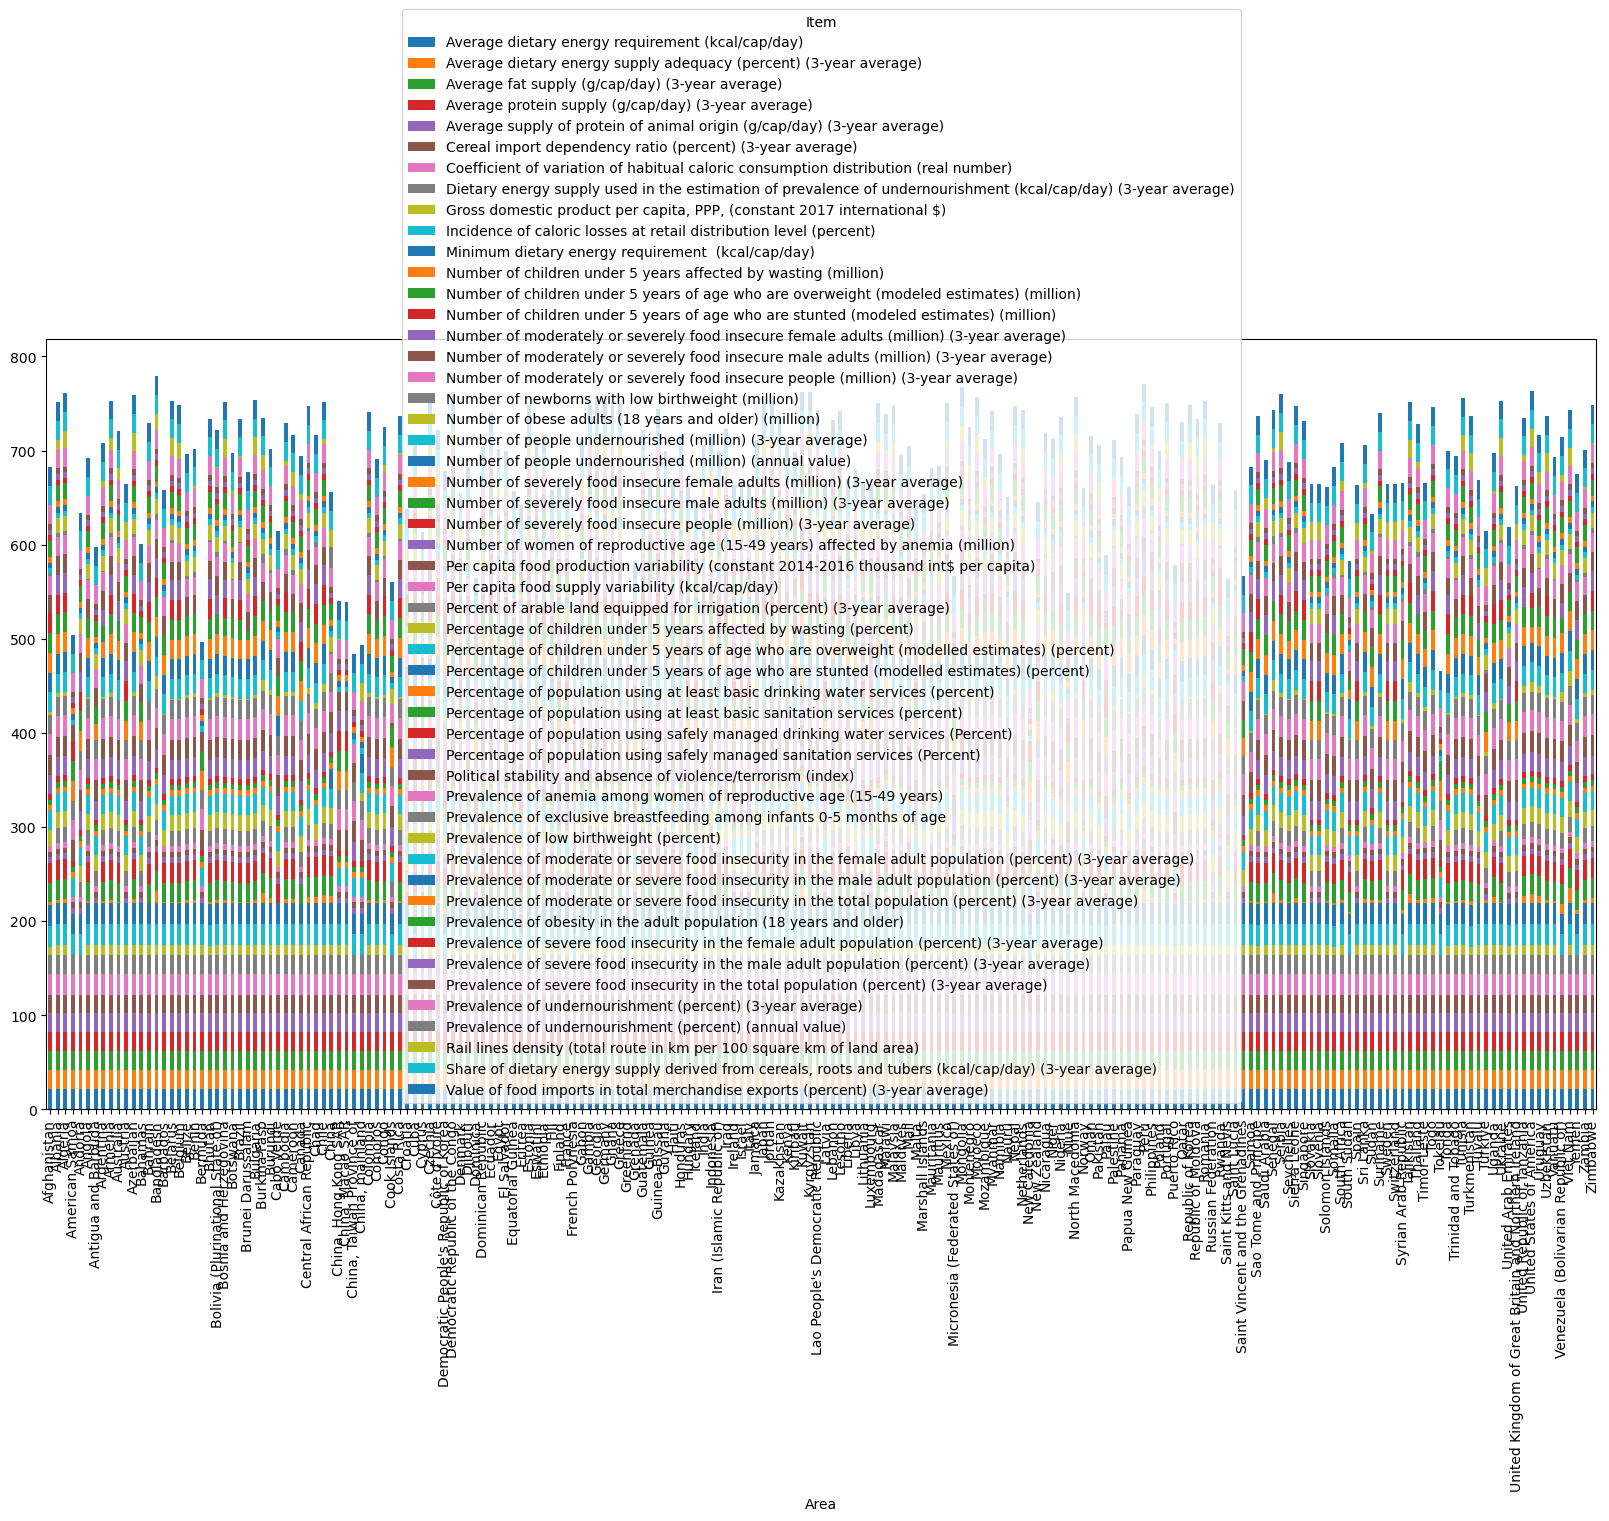

In [31]:
# how many items are there in each country
fao_data.groupby(['Area', 'Item']).size().unstack().plot(kind='bar', stacked=True, figsize=(20,10))

In [33]:
# # Area vs item vs year and flag
# fao_data.groupby(['Area', 'Item', 'Year', 'Flag']).size().unstack().plot(kind='bar', stacked=True, figsize=(20,10))

In [40]:
# missing data
fao_data.isnull().sum()

Domain Code              0
Domain                   0
Area Code (M49)          0
Area                     0
Element Code             0
Element                  0
Item Code                0
Item                     0
Year Code                0
Year                     0
Unit                     0
Value                20057
Flag                     0
Flag Description         0
Note                139787
dtype: int64

In [41]:
# # replace missing values
# fao_data['Value'].fillna(fao_data['Value'].mean(), inplace=True)
# # drop missing values
# fao_data.dropna(inplace=True)
# drop duplicates
fao_data.drop_duplicates(inplace=True)


In [42]:
# describe data
fao_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140871 entries, 0 to 140870
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Domain Code       140871 non-null  object
 1   Domain            140871 non-null  object
 2   Area Code (M49)   140871 non-null  int64 
 3   Area              140871 non-null  object
 4   Element Code      140871 non-null  int64 
 5   Element           140871 non-null  object
 6   Item Code         140871 non-null  object
 7   Item              140871 non-null  object
 8   Year Code         140871 non-null  int64 
 9   Year              140871 non-null  object
 10  Unit              140871 non-null  object
 11  Value             120814 non-null  object
 12  Flag              140871 non-null  object
 13  Flag Description  140871 non-null  object
 14  Note              1084 non-null    object
dtypes: int64(3), object(12)
memory usage: 17.2+ MB


In [43]:
fao_data['Note'].value_counts()

Official estimate integrated with FAO data    1000
Official estimate                               84
Name: Note, dtype: int64

In [44]:
# value counts for each column
for col in fao_data.columns:
    print(col)
    print(fao_data[col].value_counts())
    print(' ')

Domain Code
FS    140871
Name: Domain Code, dtype: int64
 
Domain
Suite of Food Security Indicators    140871
Name: Domain, dtype: int64
 
Area Code (M49)
50     779
604    771
496    767
840    763
180    762
      ... 
156    493
540    487
258    487
158    484
772    466
Name: Area Code (M49), Length: 204, dtype: int64
 
Area
Bangladesh                          779
Peru                                771
Mongolia                            767
United States of America            763
Democratic Republic of the Congo    762
                                   ... 
China, mainland                     493
New Caledonia                       487
French Polynesia                    487
China, Taiwan Province of           484
Tokelau                             466
Name: Area, Length: 204, dtype: int64
 
Element Code
6121    66698
6132    27967
6128    17544
6123    12240
6127     4488
6173     4488
6125     3908
6126     2038
6124     1500
Name: Element Code, dtype: int64
 
Element
Value 

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
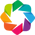

Imported v0.1.58. After importing, execute '%matplotlib inline' to display charts in Jupyter.
    AV = AutoViz_Class()
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Update: verbose=0 displays charts in your local Jupyter notebook.
        verbose=1 additionally provides EDA data cleaning suggestions. It also displays charts.
        verbose=2 does not display charts but saves them in AutoViz_Plots folder in local machine.
        chart_format='bokeh' displays charts in your local Jupyter notebook.
        chart_format='server' displays charts in your browser: one tab for each chart type
        chart_format='html' silently saves interactive HTML files in your local machine


In [46]:
from autoviz.AutoViz_Class import AutoViz_Class
# create a class
AV = AutoViz_Class()

In [47]:
sep = ','
target = 'Area'

In [56]:
dft = AV.AutoViz(filename, target, "",
           header=0, verbose=1,
            lowess=False,chart_format='bokeh',max_rows_analyzed=150000,max_cols_analyzed=30)

Shape of your Data Set loaded: (140871, 3)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


    3 Predictors classified...
Cannot visualize this dataset since no numeric or integer vars in data...returning
Not able to read or load file. Please check your inputs and try again...


In [54]:
filename = "D:/vscode/python/unbdh/data/raw/FAOMasterDataset.csv"

In [55]:
_ = AV.AutoViz(filename)

Shape of your Data Set loaded: (140871, 15)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


    15 Predictors classified...
        4 variables removed since they were ID or low-information variables
        List of variables removed: ['Domain Code', 'Domain', 'Element', 'Note']
Number of All Scatter Plots = 6


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\cmudict.zip.
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gazetteers.zip.
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\genesis.zip.
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gutenberg.zip.
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_dat

KeyboardInterrupt: 